# **Exploratory Data Analysis - Retail GRIP TASK #3 **

# **Data Analysis by- SHRIYA PANDEY**




In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import matplotlib.style as style

READING THE DATA

Lets us read the data and take a look at first few rows.

In [2]:
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


EXPLORATORY DATA ANALYSIS

In [3]:
#row,column count of data
df.shape

(9994, 13)

In [4]:
#column names of table
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
#check data type of columns/attributes
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

Lets check if there are any missing values in the data

In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [8]:
#THe above operation shows that all the data is for United States only.Thus, we don't need to  analyze countrywise.

Let's analyze the distribution of categories available.

In [9]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

Let's analyze the distribution of subcategories.

In [10]:
df['Sub-Category'].value_counts()


Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

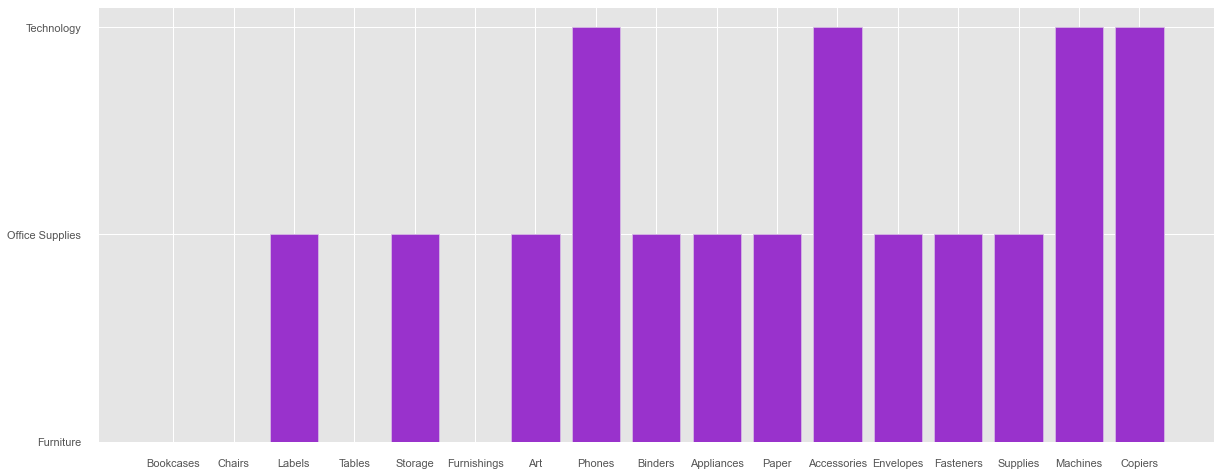

In [97]:
style.use('ggplot')
plt.figure(figsize=(20,8))
plt.bar('Sub-Category','Category',data=df,color='darkorchid')
plt.show()
#This graph shows the distribution of Sub-Category wrt Category. 
#Office supplies are the most in demand.

**This graph shows number of items sold of each Sub-Category wrt Category
From the graph, the items with huge demands can be inferred
It is clearly visible in the graph that The item 'Binders', which falls under the Category 'Office Supplies' has the highest demand.
Top 5 Products in demand are - Binders, Paper, furnishings, phones, storage.**

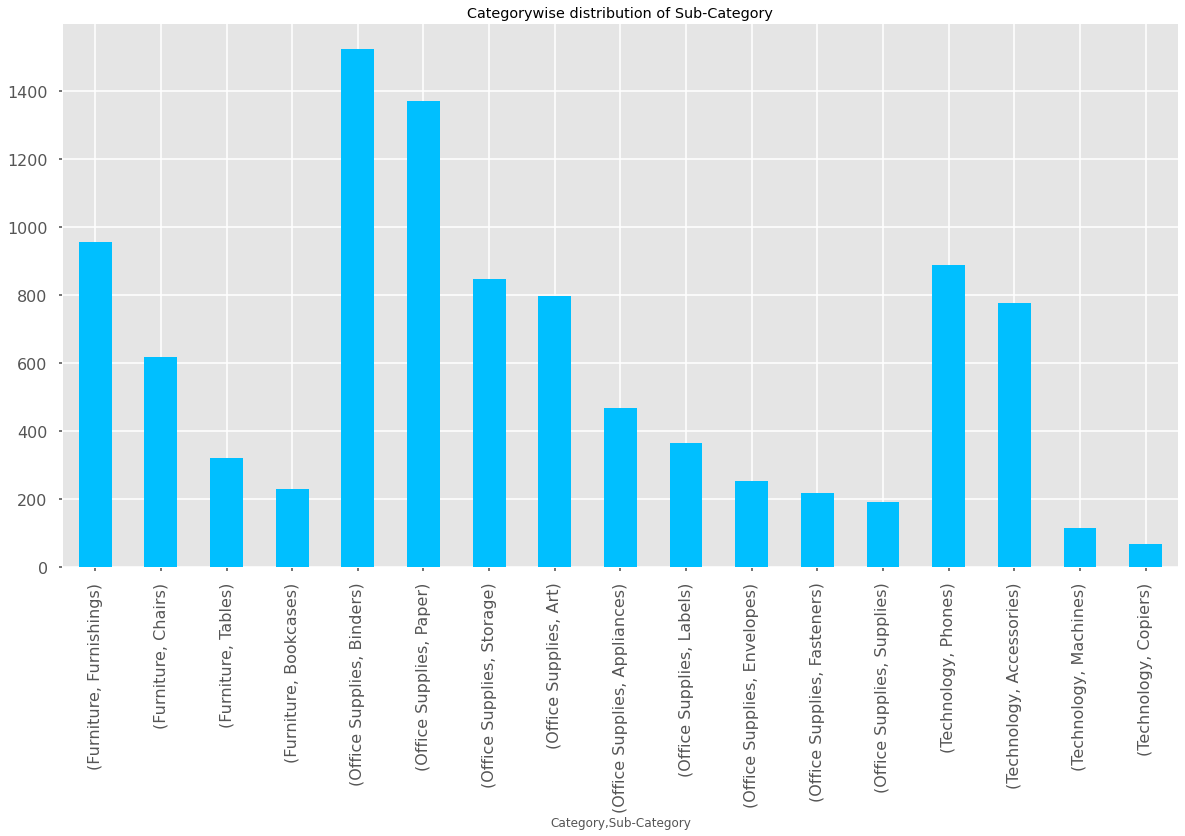

In [91]:
style.use('ggplot')
df.groupby('Category')['Sub-Category'].value_counts().plot.bar(figsize=(20,10),color='deepskyblue')
plt.title('Categorywise distribution of Sub-Category')
#plt.grid(True,color='k')
plt.show()
#This graph shows number of items sold of each Sub-Category wrt Category
#FFrom the graph, the items with huge demands can be inferred
#It is clearly visible in the graph that The item 'Binders', which falls under the Category 'Office Supplies' has the highest demand.
#Top 5 Products in demand are - Binders, Paper, furnishings, phones, storage.

From this graph, one can easily makeout which Category & Sub-Category to choose when they are looking to purchase a product

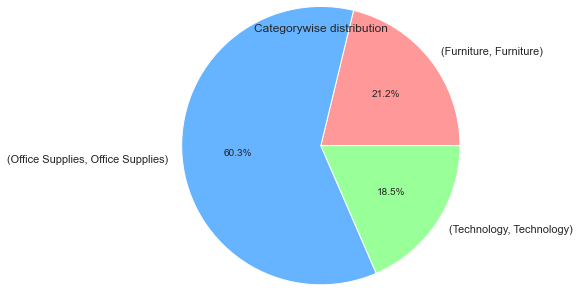

In [103]:
colors = ['#ff9999','#66b3ff','#99ff99']
df.groupby('Category')['Category'].value_counts().plot.pie(autopct="%.1f%%",colors=colors,radius = 1.6)
plt.title('Categorywise distribution')
plt.show()

Text(0.5, 1.0, 'Sub-Category Count')

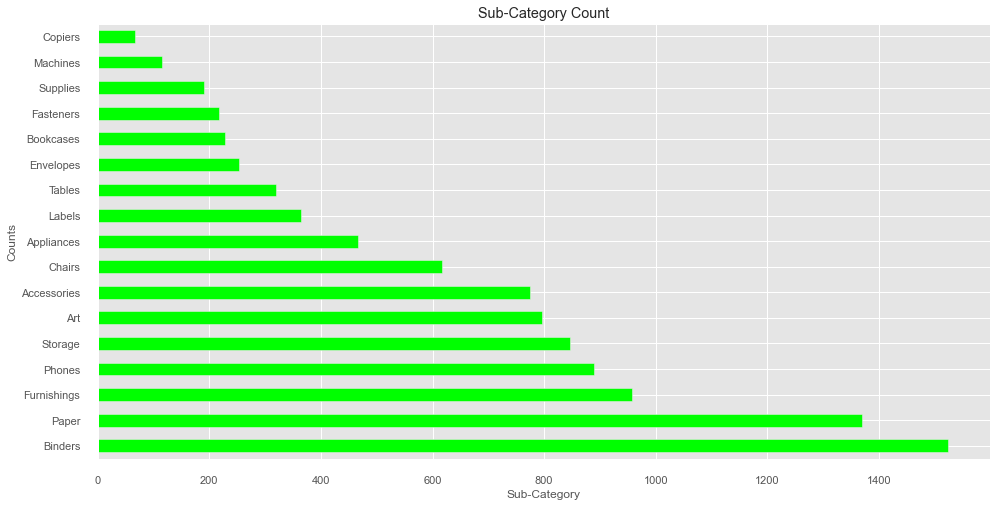

In [104]:
style.use('ggplot')
plt.figure(figsize=(16,8))
df['Sub-Category'].value_counts().plot.barh(color='lime')
plt.xlabel('Sub-Category')
plt.ylabel('Counts')
plt.title('Sub-Category Count')
#this plot shows the skewed arrangement of number of units of each sub category sold. 

The following plot compares total profit and sales per category.
The highest sales as well as the highest profit is from the category 'Technology', This shows that it's demand 
is high and we should increase the production of this category, this will tend to increase the total profit of the superstore. The profit margin for furniture is low as compared to the other two categories despite decent sales.

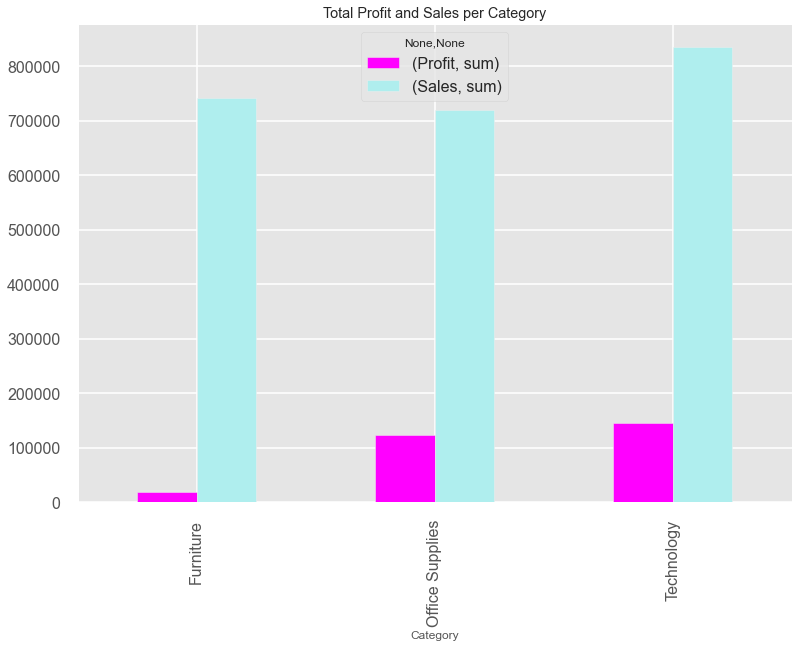

In [131]:
style.use('ggplot')
df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar(color=['fuchsia', 'paleturquoise'])
plt.title('Total Profit and Sales per Category')
plt.show()
#the following plot compares total profit and sales per category
#The highest sales as well as the highest profit is from the category 'Technology', This shows that it's demand 
#is high and we should increase the stock of this category, this will tend to increase the total profit of the superstore.

The first plot below shows the top Sub-Categories wrt Sales
The following graph shows the top Sub-Categories wrt Profit
Furniture category is in loss
From the below to plots we can infer that Many sub-categories have high sales but are not making much profit or 
are in loss,so we majorly need to focus on such categories, we have to look in to either moving these from loss
to profit or should stop selling them.
We should include more brands for the items which are making profit like Copiers , papers, accessories etc which will attract more buyers.

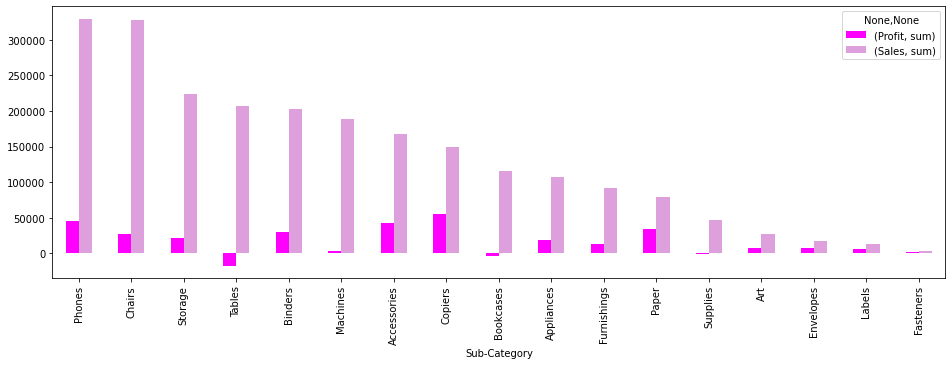

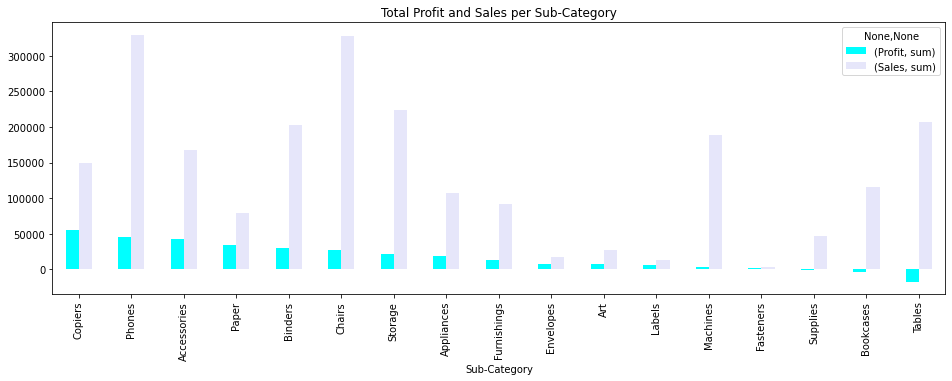

In [53]:

df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).sort_values(('Sales','sum'),ascending=False).plot.bar(figsize=(16, 5),color=['fuchsia', 'plum'])

df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).sort_values(('Profit','sum'),ascending=False).plot.bar(figsize=(16, 5),color=['aqua', 'lavender'])
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

#The first plot below shows the top Sub-Categories wrt Sales
#The following graph shows the top Sub-Categories wrt Profit
#Furniture category is in loss
#From the below two plots we can infer that Many sub-categories have high sales but are not making much profit or 
#are in loss,so we majorly need to focus on such categories, we have to look in to either moving these from loss
#to profit or should stop selling them.
#We should include more brands for the items which are making profit like Copiers , papers, accessories etc which will attract more buyers.

The following plot shows statewise skewed distribution of Total sales and Profit.
We should intoduce new products in areas where Sales are high.
For the areas which are low in sales, we should focus more on products which are in demand in that area and should cutoff the stocks of products which are not in demand in that particular area.

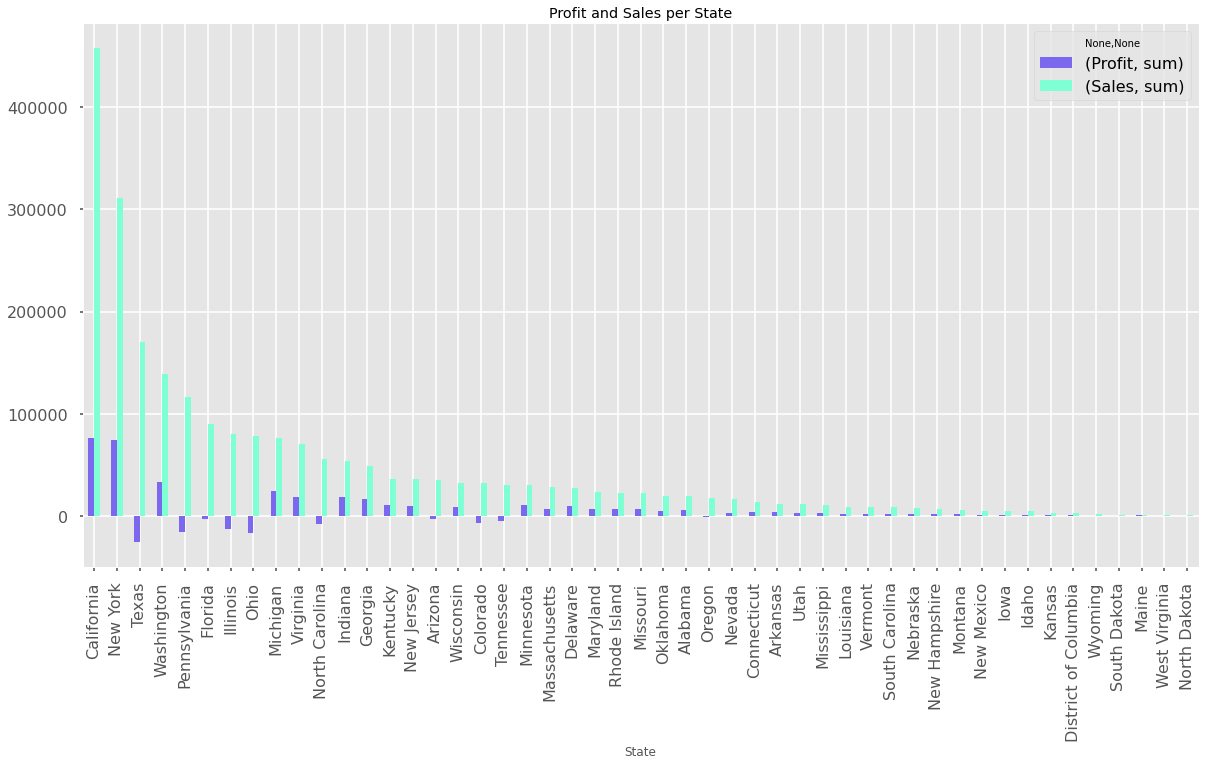

In [87]:
style.use('ggplot')
df.groupby('State')['Profit','Sales'].agg(['sum']).sort_values(('Sales','sum'),ascending=False).plot.bar(figsize=(20,10),color=['mediumslateblue', 'aquamarine'])
plt.title('Profit and Sales per State')
plt.show()


**States like California and New york have high Sales as well as profit, but for the states Texas, Pennsylvania, Illinois, Ohio, 
North Carolina, Colorado and Arizona Superstore is in Loss.We should consider shutting the stores in loss or cutting off the stocks.**

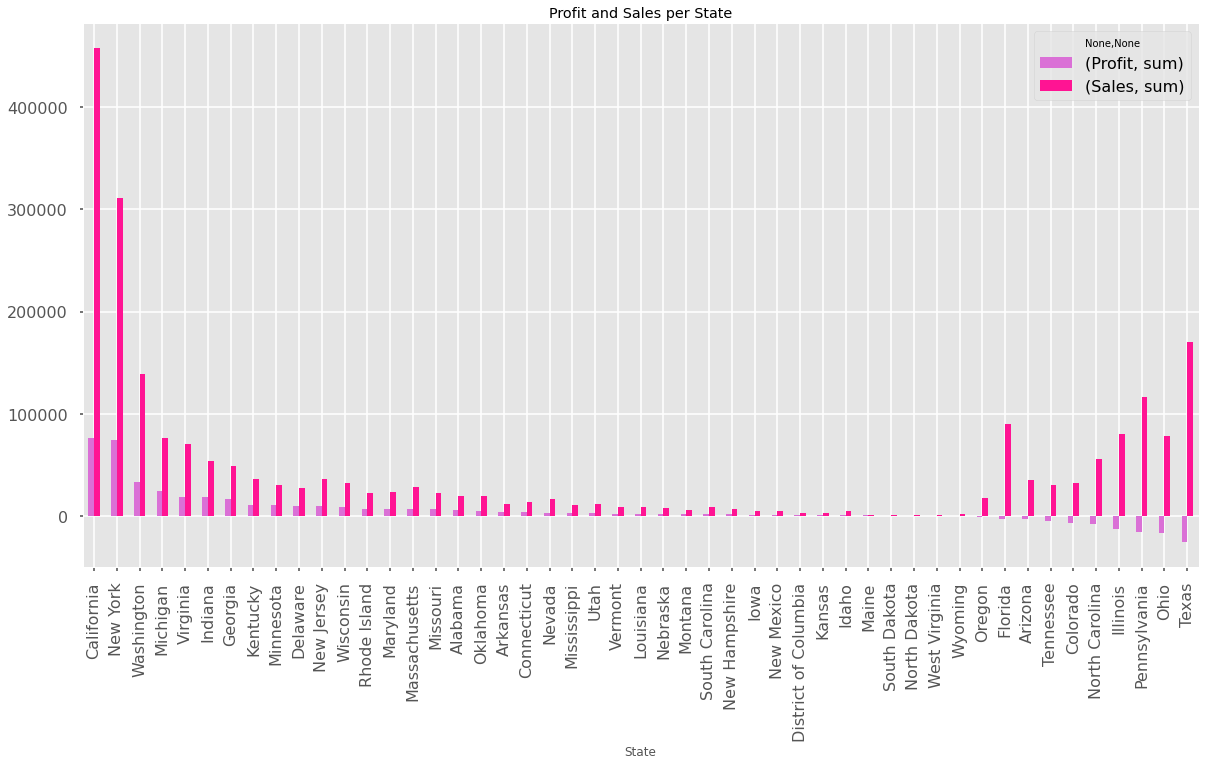

In [88]:
style.use('ggplot')
df.groupby('State')['Profit','Sales'].agg(['sum']).sort_values(('Profit','sum'),ascending=False).plot.bar(figsize=(20,10),color=['orchid', 'deeppink'])
plt.title('Profit and Sales per State')
plt.show()

In [19]:
df_Sales=df.groupby('State')['Profit','Sales'].agg(['sum'])
df_sorted_desc= df_Sales.sort_values(('Sales', 'sum'),ascending=False)
df_sorted_desc.head()
#Total saleswise top 5 states.

,Profit,Sales
,sum,sum
State,,
California,76381.3871,457687.6315
New York,74038.5486,310876.2710
Texas,-25729.3563,170188.0458
Washington,33402.6517,138641.2700
Pennsylvania,-15559.9603,116511.9140


In [20]:
df_sorted_desc['Sales'].head()

,sum
State,
California,457687.6315
New York,310876.2710
Texas,170188.0458
Washington,138641.2700
Pennsylvania,116511.9140


In [21]:
df_sorted_desc.dtypes

Profit  sum    float64
Sales   sum    float64
dtype: object

In [22]:
df_Sales_Sum=df_sorted_desc['Sales']
df_Sales_Sum.head()

,sum
State,
California,457687.6315
New York,310876.2710
Texas,170188.0458
Washington,138641.2700
Pennsylvania,116511.9140


**#Descriptive Statistics of Sales**

In [23]:
#Descriptive Statistics of Sales
df_sorted_desc.Sales.describe()

,sum
count,49.000000
mean,46881.650210
std,80776.294534
min,919.910000
25%,7464.930000
50%,22205.150000
75%,49095.840000
max,457687.631500


<AxesSubplot:>

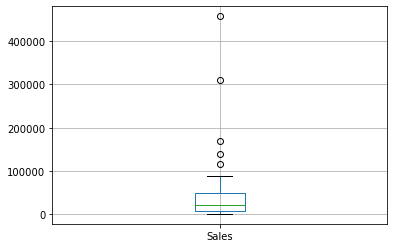

In [24]:
df_sorted_desc.boxplot(column='Sales')

In [25]:
#df_top10=df['State'].value_counts().head(10)
#df_top10

In [26]:
#df_top10.plot.bar()

In [67]:
#fig, axes = plt.subplots(1, 2, figsize=(16, 12))
#plt.figure(figsize=(15,12))
#fig.suptitle('Sales per State')
#sns.barplot( data=df, x='Sales', y='State',ci=None)
#sns.barplot(ax=axes[1], data=df_sorted_desc, x='State', y='Profit',ci=None)
#plt.show()

**Segmentwise Analysis**

In [28]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

**The following plot shows the segmentwise total profit and sales.
Highest Sales as well as profit is from the Consumer segment followed by corporate and Home office segments.**


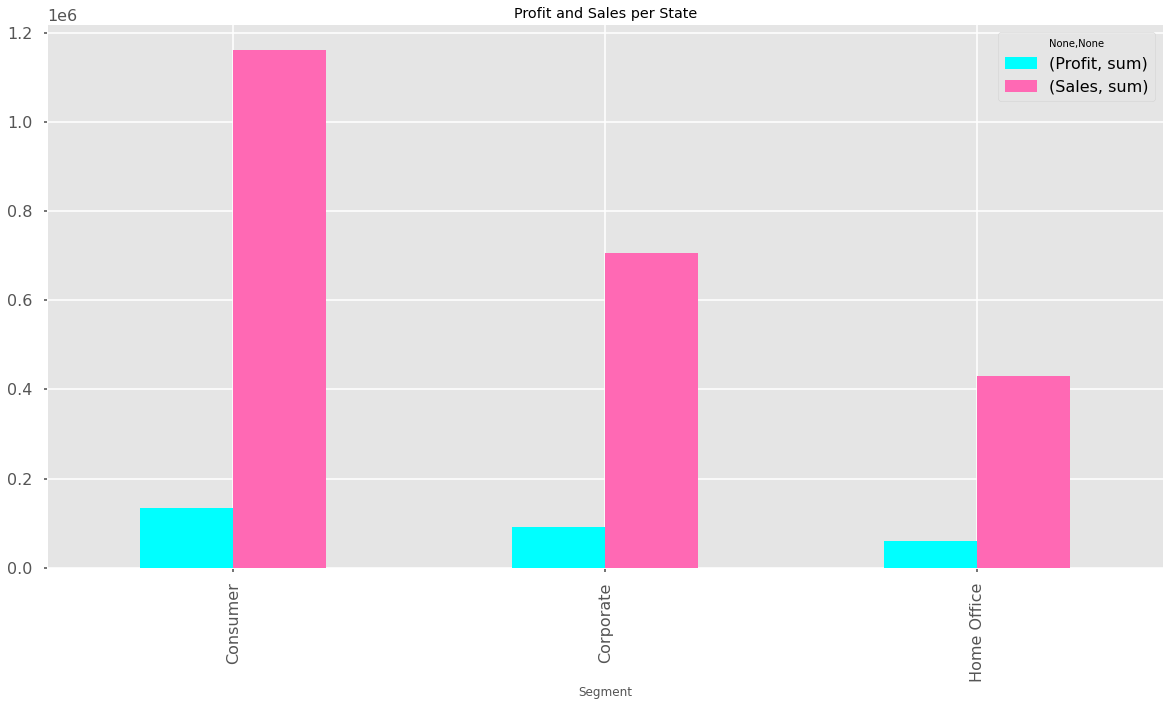

In [86]:
style.use('ggplot')
df.groupby('Segment')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(20,10),color=['aqua', 'hotpink'])
plt.title('Profit and Sales per State')
plt.show()

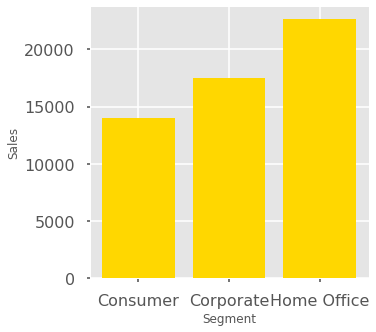

In [83]:
plt.figure(figsize=(5,5))
plt.bar('Segment','Sales',data=df,color='gold')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()



In [112]:
df_Segment=df.groupby('Segment')['Segment','Sub-Category','Sales']
df_Segment.head()

,Segment,Sub-Category,Sales
0,Consumer,Bookcases,261.9600
1,Consumer,Chairs,731.9400
2,Corporate,Labels,14.6200
3,Consumer,Tables,957.5775
4,Consumer,Storage,22.3680
5,Consumer,Furnishings,48.8600
14,Home Office,Appliances,68.8100
15,Home Office,Binders,2.5440
21,Corporate,Art,19.4600
22,Corporate,Appliances,60.3400


**from the plot below, it can be inferred that which Products aree in more demand for each segment, so we should focus on high in demand products of each segment, to increase the profit and sales for those segments.**

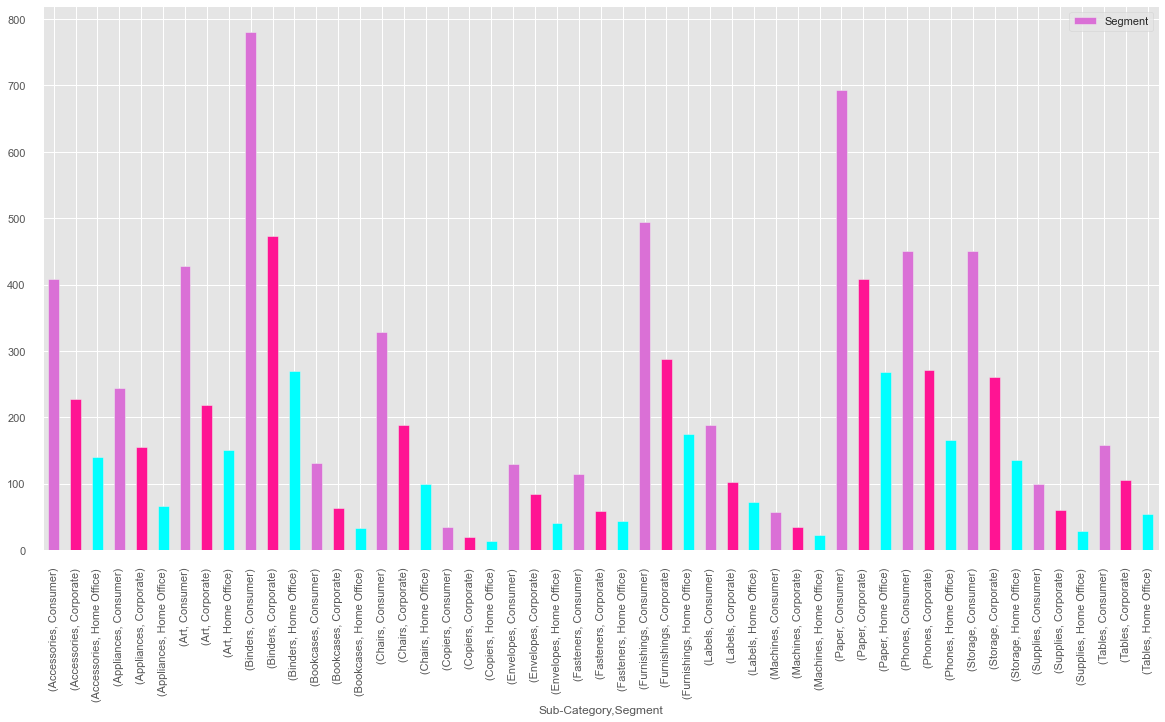

In [129]:
df.groupby('Sub-Category')['Segment'].value_counts().plot.bar(figsize=(20,10),color=['orchid', 'deeppink','aqua'])
plt.legend()
plt.show()

**Below is the region-wise didtribution of demand in categories.But a similar kind of relationship is observed between region and demand of categories for every category.For every region 'office-supplies' is the most demanded category which is followed by furniture and technology.**

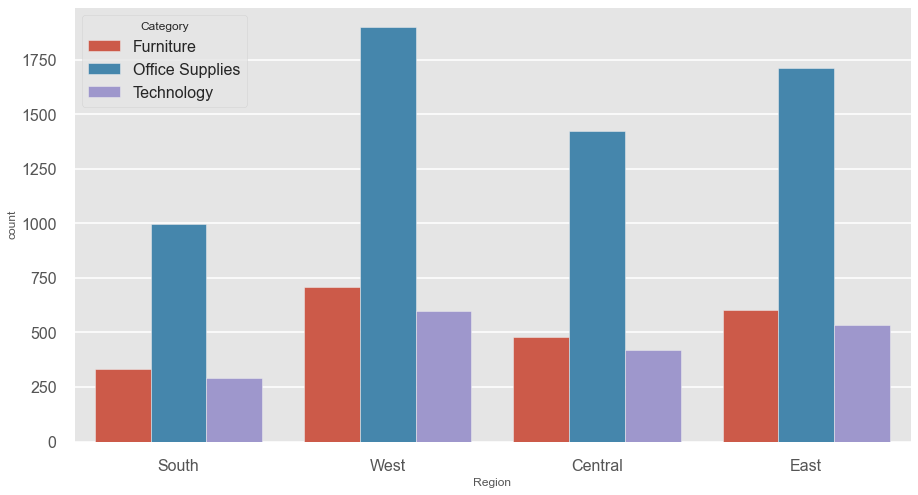

In [130]:

style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
plt.figure(figsize=(15,8))
sns.countplot(x="Region", hue="Category", data=df)

plt.show()

**Below plot shows profit and sales per region.
Highest sales and profit of the superstore is in West region whereas least in the south region, we should focus on increasing the sales and profit in the south region.Further it can be seen from the figure that profit for central region is very low, so we should try to increase the profit in this region.**

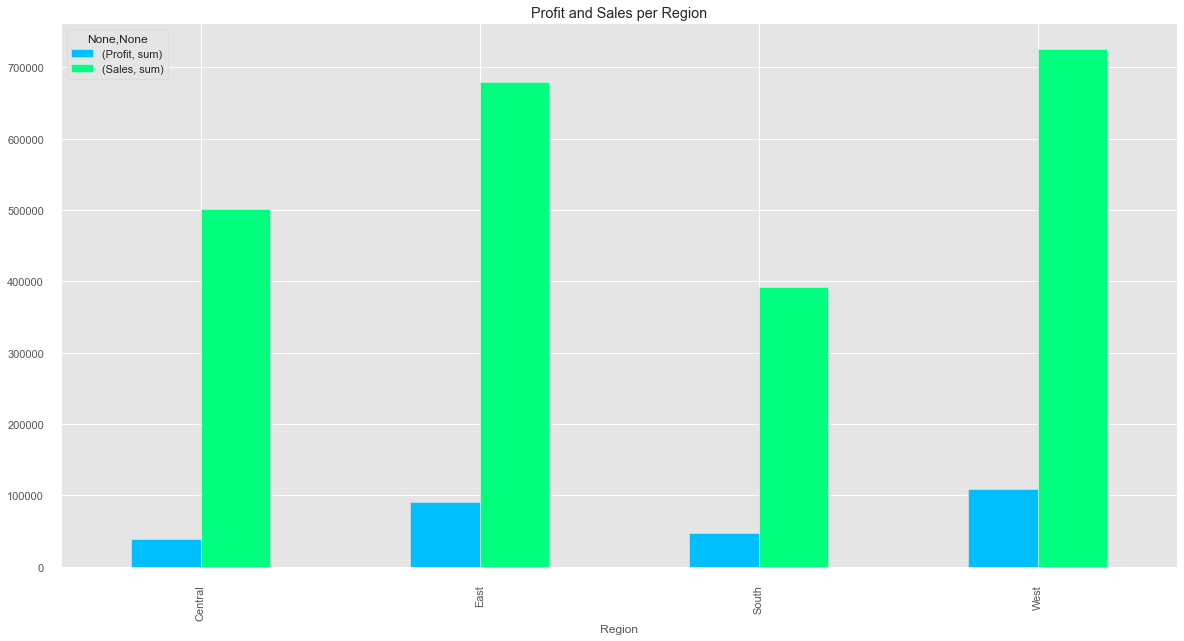

In [107]:
df.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(20,10),color=['deepskyblue','springgreen'])
plt.title('Profit and Sales per Region')
plt.show()

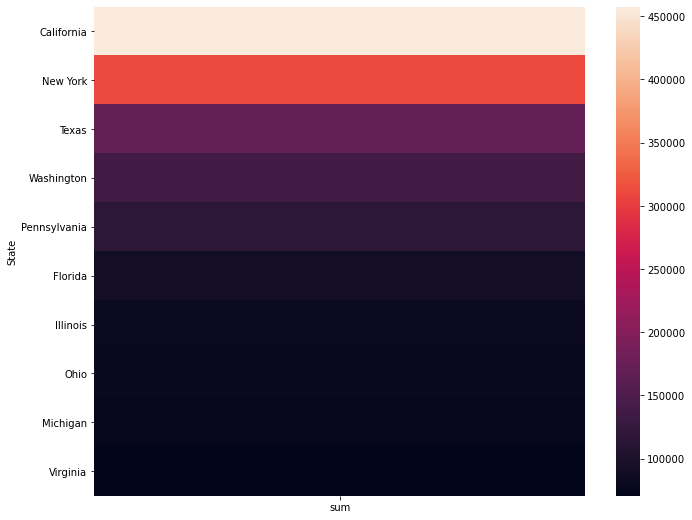

In [34]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_sorted_desc['Sales'].head(10))
plt.show()
#below plot again shows the statewise sales distribution

**Below is the scater plot to find out the relationship between Profit and Discount**

<AxesSubplot:xlabel='Profit', ylabel='Discount'>

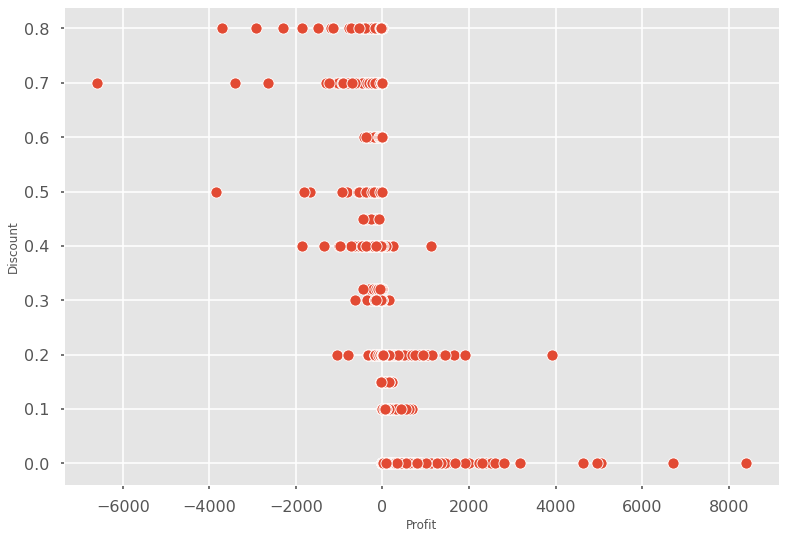

In [92]:
style.use('ggplot')
sns.scatterplot(data=df, x="Profit", y="Discount")


<AxesSubplot:xlabel='Sales', ylabel='count'>

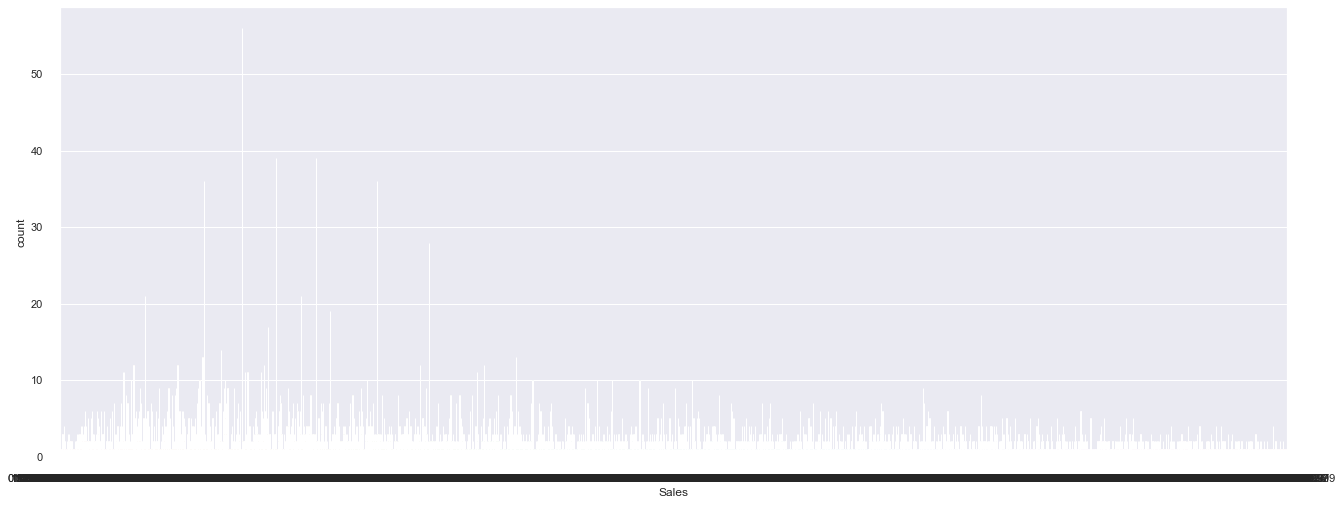

In [99]:
style.use('ggplot')
sns.set(rc={'figure.figsize':(22,8.27)})
sns.countplot(x='Sales', data=df)
#below is the countplot of sales for observing the pattern of sales throughout, it shows a large variation(increase and decrease) in sales at some points, 
#which can be used to focus on the weak points to improve sales and profit.